<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-06-21 15:38:27--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  65.5MB/s    in 3.1s    

2025-06-21 15:38:30 (65.5 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 185.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 157.1 MB/s eta 0:00:00


In [3]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 162.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 113.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 76.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 128.3 MB/s eta 0:00:00


In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


In [13]:
df.head

<bound method NDFrame.head of                    Age  CompTotal
72     18-24 years old  2040000.0
426    18-24 years old    50000.0
445    18-24 years old  1140000.0
484    18-24 years old     6000.0
542    18-24 years old    36000.0
...                ...        ...
65288  18-24 years old   180000.0
65334  18-24 years old    24000.0
65363  18-24 years old    55000.0
65366  18-24 years old   300000.0
65396  18-24 years old    36000.0

[4606 rows x 2 columns]>

In [24]:
import sqlite3
import pandas as pd

# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query the first 20 rows of Age and TimeSearching
QUERY = """
SELECT Age, TimeSearching
FROM main
LIMIT 20
"""
df = pd.read_sql_query(QUERY, conn)

# Show the result
print(df)

# Optional: Show unique TimeSearching values
print("\nUnique TimeSearching values:")
print(df['TimeSearching'].unique())

# Close connection after you're done
conn.close()


                   Age         TimeSearching
0   Under 18 years old                  None
1      35-44 years old                  None
2      45-54 years old                  None
3      18-24 years old                  None
4      18-24 years old                  None
5   Under 18 years old                  None
6      35-44 years old                  None
7      18-24 years old                  None
8      45-54 years old                  None
9      35-44 years old                  None
10     35-44 years old   30-60 minutes a day
11     45-54 years old                  None
12     35-44 years old   30-60 minutes a day
13     35-44 years old                  None
14     25-34 years old                  None
15     45-54 years old  60-120 minutes a day
16  Under 18 years old                  None
17     18-24 years old                  None
18     25-34 years old   15-30 minutes a day
19     35-44 years old                  None

Unique TimeSearching values:
[None '30-60 minutes a da

In [39]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('survey-data.sqlite')

# Replace 'JobSat' below with the exact column name
query = "SELECT JobSat FROM main LIMIT 20"
df = pd.read_sql_query(query, conn)

print(df)

conn.close()




    JobSat
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     8.0
11     NaN
12     8.0
13     NaN
14     NaN
15     5.0
16     NaN
17     NaN
18    10.0
19     NaN


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


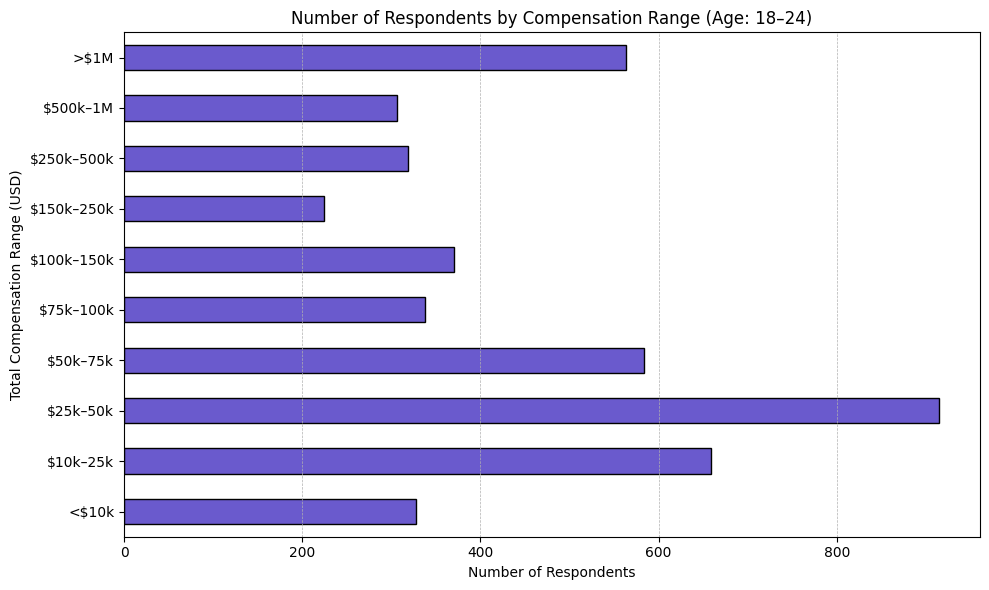

In [18]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Step 2: Query Age and CompTotal from the database
QUERY = """
SELECT Age, CompTotal
FROM main
"""
df = pd.read_sql_query(QUERY, conn)

# Step 3: Clean the data
df = df.dropna()
df = df[df['CompTotal'] > 0]

# Optional: Focus on a specific age group
df = df[df['Age'] == '18-24 years old']

# Step 4: Define compensation bins
bins = [0, 10000, 25000, 50000, 75000, 100000, 150000, 250000, 500000, 1000000, float('inf')]
labels = [
    '<$10k', '$10k–25k', '$25k–50k', '$50k–75k', '$75k–100k',
    '$100k–150k', '$150k–250k', '$250k–500k', '$500k–1M', '>$1M'
]

# Step 5: Bin the compensation values
df['CompRange'] = pd.cut(df['CompTotal'], bins=bins, labels=labels, right=False)

# Step 6: Count respondents in each compensation range
comp_counts = df['CompRange'].value_counts().sort_index()

# Step 7: Plot horizontal bar chart
plt.figure(figsize=(10, 6))
comp_counts.plot(kind='barh', color='slateblue', edgecolor='black')
plt.title('Number of Respondents by Compensation Range (Age: 18–24)')
plt.xlabel('Number of Respondents')
plt.ylabel('Total Compensation Range (USD)')
plt.grid(axis='x', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Step 8: Close DB connection
conn.close()


**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


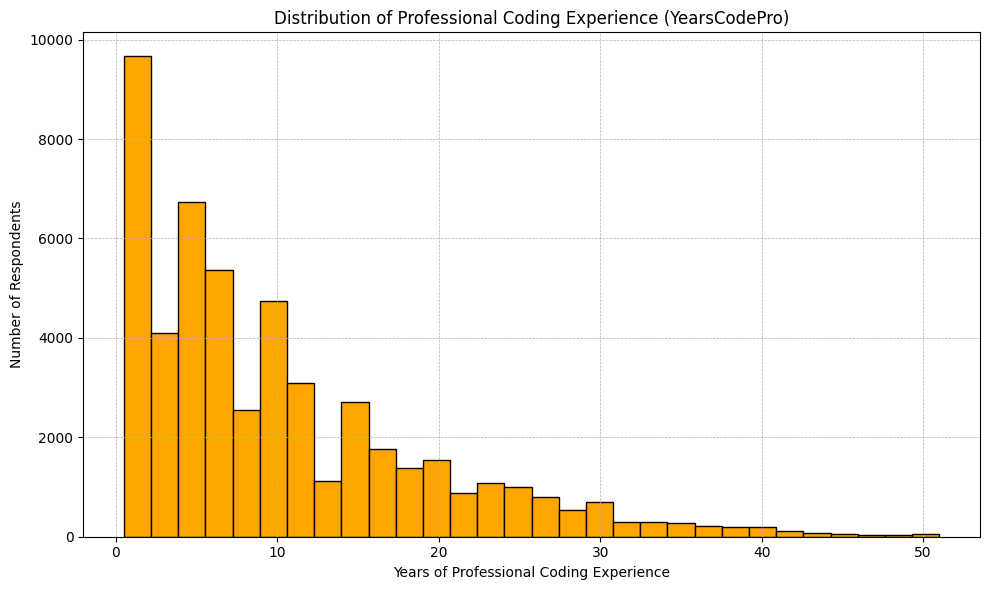

In [11]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Step 2: Query YearsCodePro from the 'main' table
QUERY = """
SELECT YearsCodePro
FROM main
"""
df = pd.read_sql_query(QUERY, conn)

# Step 3: Clean the data
# Replace 'Less than 1 year' with 0.5 and 'More than 50 years' with 51
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 51
})

# Convert to numeric, coercing errors (e.g., empty strings or malformed entries)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop missing values
df = df.dropna()

# Step 4: Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df['YearsCodePro'], bins=30, color='orange', edgecolor='black')
plt.title('Distribution of Professional Coding Experience (YearsCodePro)')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Number of Respondents')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Step 5: Close DB connection
conn.close()


### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


/tmp/ipykernel_300/826748331.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['CompRange', 'Age']).size().unstack(fill_value=0)


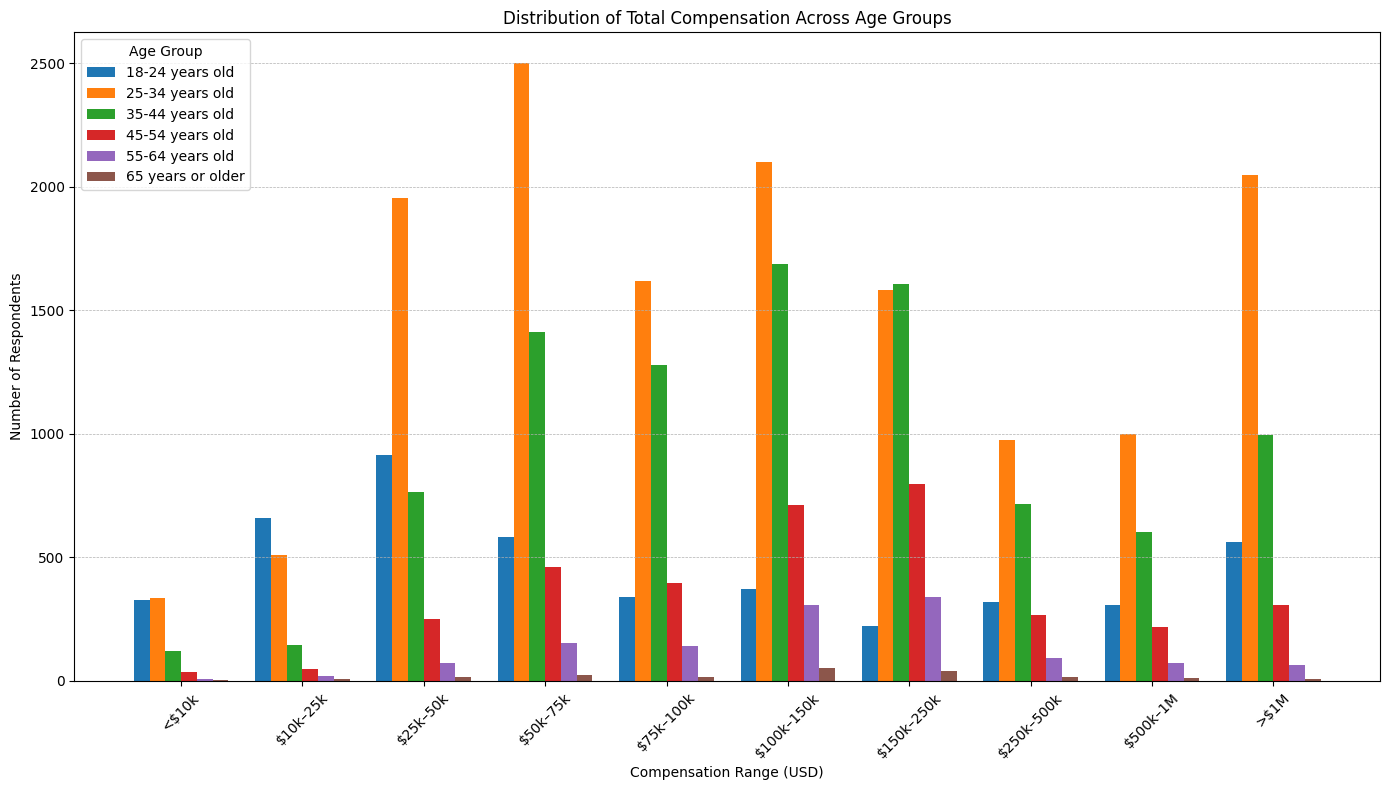

In [19]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Connect to the database
conn = sqlite3.connect('survey-data.sqlite')

# Step 2: Query Age and CompTotal
QUERY = """
SELECT Age, CompTotal
FROM main
"""
df = pd.read_sql_query(QUERY, conn)

# Step 3: Clean the data
df = df.dropna()
df = df[df['CompTotal'] > 0]

# Step 4: Define age groups to include
age_groups = [
    '18-24 years old', '25-34 years old', '35-44 years old',
    '45-54 years old', '55-64 years old', '65 years or older'
]
df = df[df['Age'].isin(age_groups)]

# Step 5: Define compensation bins and labels
bins = [0, 10000, 25000, 50000, 75000, 100000, 150000, 250000, 500000, 1000000, float('inf')]
labels = [
    '<$10k', '$10k–25k', '$25k–50k', '$50k–75k', '$75k–100k',
    '$100k–150k', '$150k–250k', '$250k–500k', '$500k–1M', '>$1M'
]

# Step 6: Bin the compensation data
df['CompRange'] = pd.cut(df['CompTotal'], bins=bins, labels=labels, right=False)

# Step 7: Group and pivot the data (count of respondents per age group per comp bin)
grouped = df.groupby(['CompRange', 'Age']).size().unstack(fill_value=0)

# Step 8: Plot grouped bar chart
x = np.arange(len(grouped.index))  # Compensation bins
width = 0.13  # Width of each bar

plt.figure(figsize=(14, 8))
for i, age in enumerate(age_groups):
    plt.bar(x + i * width, grouped[age], width=width, label=age)

# Formatting
plt.xticks(x + width * (len(age_groups) - 1) / 2, grouped.index, rotation=45)
plt.xlabel('Compensation Range (USD)')
plt.ylabel('Number of Respondents')
plt.title('Distribution of Total Compensation Across Age Groups')
plt.legend(title='Age Group')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Step 9: Close DB connection
conn.close()


**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


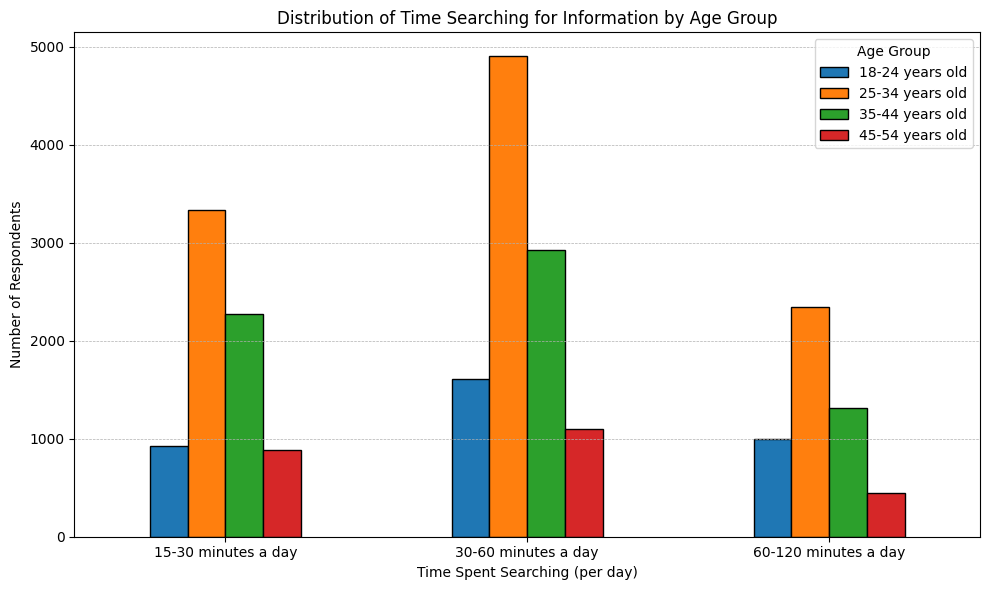

In [25]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Step 2: Query Age and TimeSearching
QUERY = """
SELECT Age, TimeSearching
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
conn.close()

# Step 3: Filter only valid TimeSearching values (drop None/NaN)
df = df.dropna(subset=['TimeSearching'])

# Step 4: Focus on selected age groups for clarity
selected_ages = ['18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old']
df = df[df['Age'].isin(selected_ages)]

# Step 5: Create a pivot table: rows = TimeSearching, columns = Age, values = counts
pivot = df.groupby(['TimeSearching', 'Age']).size().unstack(fill_value=0)

# Ensure consistent category order
time_order = ['15-30 minutes a day', '30-60 minutes a day', '60-120 minutes a day']
pivot = pivot.reindex(time_order)

# Step 6: Plot grouped bar chart
pivot.plot(kind='bar', figsize=(10, 6), edgecolor='black')

plt.title('Distribution of Time Searching for Information by Age Group')
plt.xlabel('Time Spent Searching (per day)')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=0)
plt.legend(title='Age Group')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()



### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


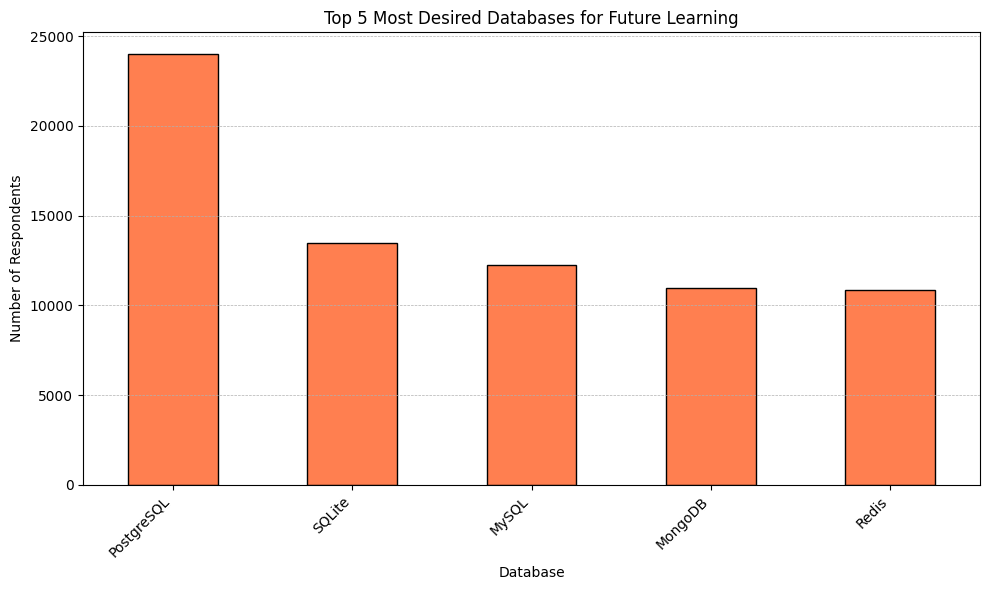

In [37]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to the database
conn = sqlite3.connect('survey-data.sqlite')

# Step 2: Query the desired database column
QUERY = """
SELECT DatabaseWantToWorkWith
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
conn.close()

# Step 3: Drop missing entries
df = df.dropna(subset=['DatabaseWantToWorkWith'])

# Step 4: Split multiple responses if separated by ; or ,
# Check your data for separator, here assuming ';'
df_exploded = df['DatabaseWantToWorkWith'].str.split(';').explode().str.strip()

# Step 5: Count frequency of each database and select top 5
top5 = df_exploded.value_counts().nlargest(5)

# Step 6: Plot the histogram (bar chart)
plt.figure(figsize=(10,6))
top5.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Top 5 Most Desired Databases for Future Learning')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


Column names: Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)


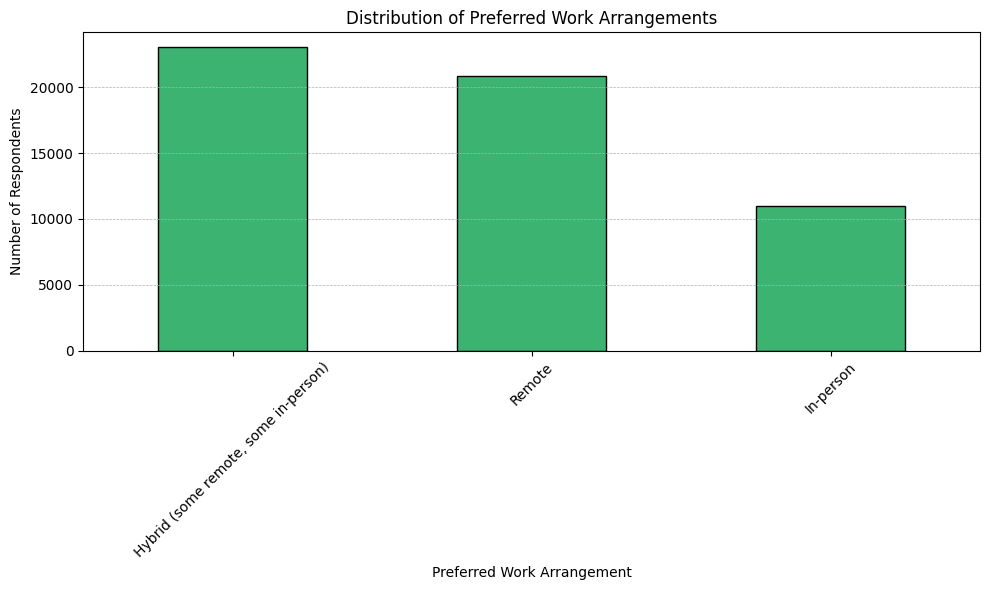

In [30]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to your SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Step 2: Query the preferred work arrangement column
# First, preview data to confirm the column name
df_preview = pd.read_sql_query("SELECT * FROM main LIMIT 5", conn)
print("Column names:", df_preview.columns)

# Let's assume the correct column is called 'RemoteWork'
# Replace 'RemoteWork' below with the actual column name if it's different
QUERY = "SELECT RemoteWork FROM main"
df = pd.read_sql_query(QUERY, conn)
conn.close()

# Step 3: Drop missing values
df = df.dropna()

# Step 4: Count frequency of each work preference
counts = df['RemoteWork'].value_counts()

# Step 5: Plot a bar chart
plt.figure(figsize=(10, 6))
counts.plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.title('Distribution of Preferred Work Arrangements')
plt.xlabel('Preferred Work Arrangement')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


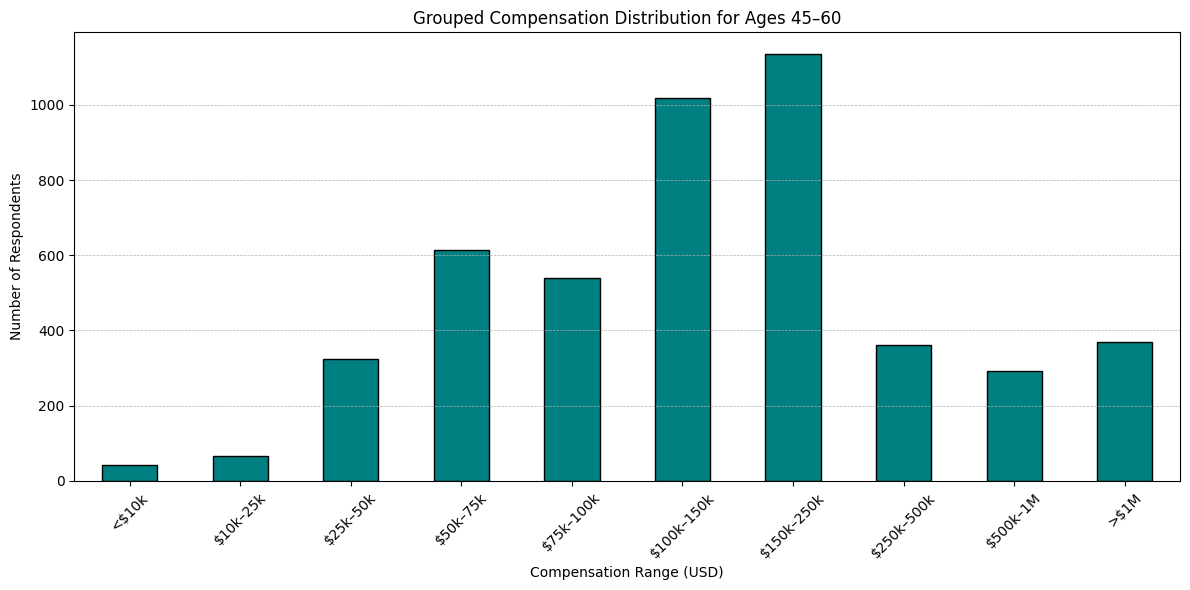

In [32]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to SQLite
conn = sqlite3.connect('survey-data.sqlite')

# Step 2: Query Age and CompTotal
QUERY = """
SELECT Age, CompTotal
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
conn.close()

# Step 3: Filter for mid-career age group
mid_career = ['45-54 years old', '55-64 years old']
df = df[df['Age'].isin(mid_career)]

# Step 4: Clean the CompTotal column
df = df.dropna(subset=['CompTotal'])
df = df[df['CompTotal'] > 0]

# Step 5: Define compensation bins and labels
bins = [0, 10000, 25000, 50000, 75000, 100000, 150000, 250000, 500000, 1000000, float('inf')]
labels = [
    '<$10k', '$10k–25k', '$25k–50k', '$50k–75k', '$75k–100k',
    '$100k–150k', '$150k–250k', '$250k–500k', '$500k–1M', '>$1M'
]

# Step 6: Bin the compensation
df['CompRange'] = pd.cut(df['CompTotal'], bins=bins, labels=labels, right=False)

# Step 7: Count the number of respondents per range
comp_counts = df['CompRange'].value_counts().sort_index()

# Step 8: Plot
plt.figure(figsize=(12, 6))
comp_counts.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Grouped Compensation Distribution for Ages 45–60')
plt.xlabel('Compensation Range (USD)')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


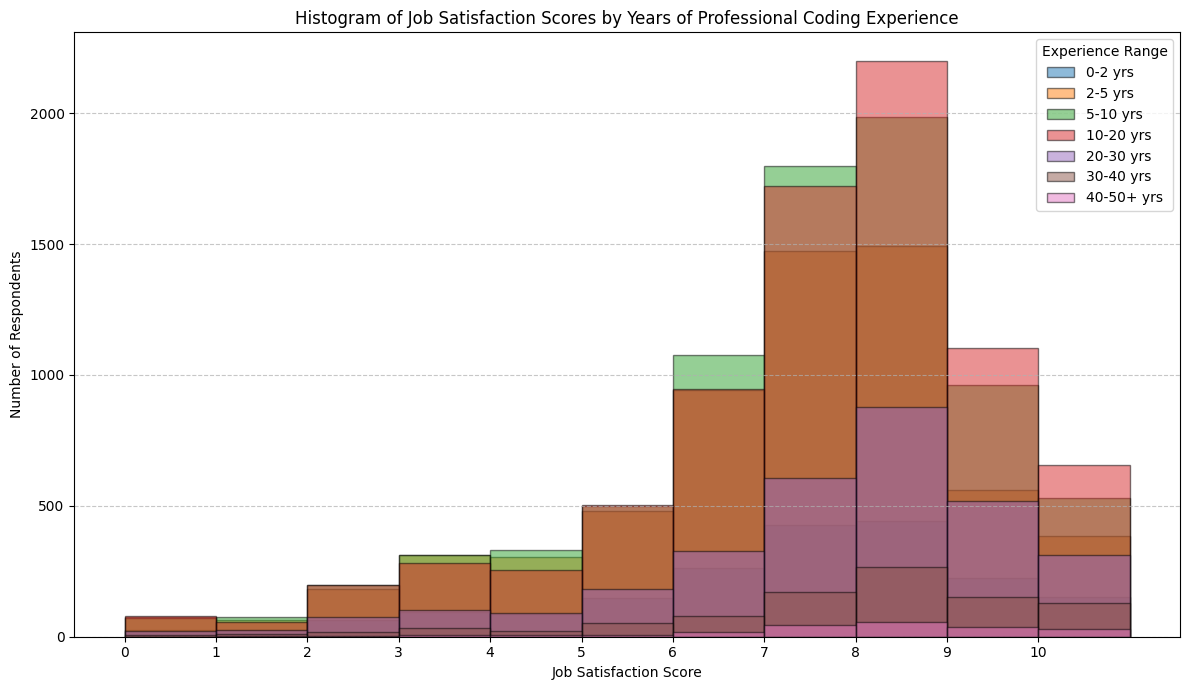

In [40]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to DB
conn = sqlite3.connect('survey-data.sqlite')

# Query JobSat and YearsCodePro columns
df = pd.read_sql_query("SELECT JobSat, YearsCodePro FROM main", conn)
conn.close()

# Convert YearsCodePro to numeric values
def convert_years(code):
    if pd.isnull(code):
        return None
    if code == 'Less than 1 year':
        return 0.5
    if code == 'More than 50 years':
        return 51
    try:
        return float(code)
    except:
        return None

df['YearsCodePro_Num'] = df['YearsCodePro'].apply(convert_years)

# Drop rows with missing JobSat or YearsCodePro
df = df.dropna(subset=['JobSat', 'YearsCodePro_Num'])

# Bin YearsCodePro for grouping
bins = [0, 2, 5, 10, 20, 30, 40, 51]
labels = ['0-2 yrs', '2-5 yrs', '5-10 yrs', '10-20 yrs', '20-30 yrs', '30-40 yrs', '40-50+ yrs']
df['ExperienceRange'] = pd.cut(df['YearsCodePro_Num'], bins=bins, labels=labels, right=False)

# Plot histogram of JobSat scores grouped by experience range
plt.figure(figsize=(12, 7))

for label in labels:
    subset = df[df['ExperienceRange'] == label]['JobSat']
    plt.hist(subset, bins=range(0, 12), alpha=0.5, label=label, edgecolor='black')

plt.xlabel('Job Satisfaction Score')
plt.ylabel('Number of Respondents')
plt.title('Histogram of Job Satisfaction Scores by Years of Professional Coding Experience')
plt.legend(title='Experience Range')
plt.xticks(range(0, 11))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [41]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
